In [1]:
%matplotlib inline
import sys
sys.path.insert(0, '/astro/users/ctslater/.local/lib/python3.6/site-packages')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.coordinates
import astropy.units as u

#plt.style.use(("paper_plots.mplstyle"))

matplotlib.rcParams['figure.dpi'] = 80

from astropy.coordinates import Galactocentric, Galactic, ICRS

import healpy as hp

cmap = matplotlib.cm.coolwarm.set_under('w')


In [90]:
#ra, dec = hp.pix2ang(hp.order2nside(7), np.arange(hp.nside2npix(hp.order2nside(7))),
#                                    lonlat=True, nest=True)
ra, dec = 20, 30

ncoords = 1000


equatorial_coords = astropy.coordinates.SkyCoord(ra*u.deg, dec*u.deg, 10*u.kpc, frame='icrs')
coords = equatorial_coords #equatorial_coords.galactic

galactocentric_angle = np.arctan2(coords.galactocentric.y, coords.galactocentric.x)
circular_vel = 210*u.km/u.s
vertical_vel = 0.0*u.km/u.s

velocities = np.random.multivariate_normal([0, 0, 0], np.diag([80, 80, 80]), ncoords)

gc_coord = Galactocentric(x=coords.galactocentric.x * np.zeros(velocities.shape[0]),
                          y=coords.galactocentric.y * np.zeros(velocities.shape[0]),
                          z=coords.galactocentric.z * np.zeros(velocities.shape[0]),
                          v_x = velocities[:,0] * u.km/u.s,
                          v_y = velocities[:,1] * u.km/u.s,
                          v_z =  velocities[:,2] * u.km/u.s,
                          # galcen_v_sun=coord.CartesianDifferential([0,220,0]*u.km/u.s)
                          )

galactic_coords_w_pm = gc_coord.transform_to(Galactic)

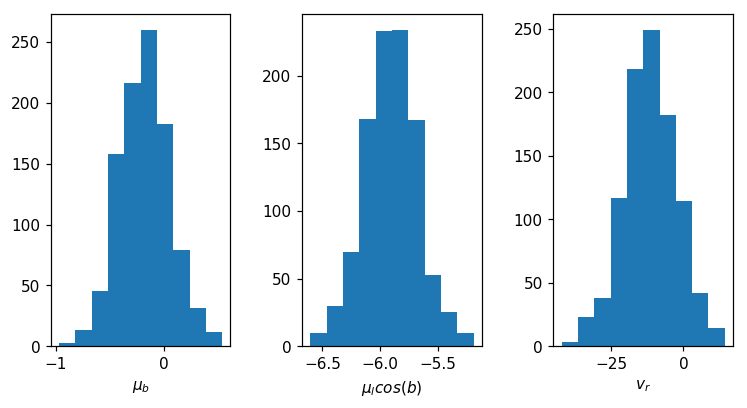

In [91]:
plt.figure(dpi=110, figsize=(8,4))

#def plot_common():
    
plt.subplot(1, 3, 1)
plt.hist(galactic_coords_w_pm.pm_b.to_value())
plt.xlabel(r"$\mu_b$")

plt.subplot(1, 3, 2)
plt.hist(galactic_coords_w_pm.pm_l_cosb.to_value())
plt.xlabel(r"$\mu_l cos(b)$")

plt.subplot(1, 3, 3)
plt.hist(galactic_coords_w_pm.radial_velocity.to_value())
plt.xlabel(r"$v_r$")

plt.subplots_adjust(wspace=0.4)

Text(0,0.5,'$\\mu_l cos(b)$')

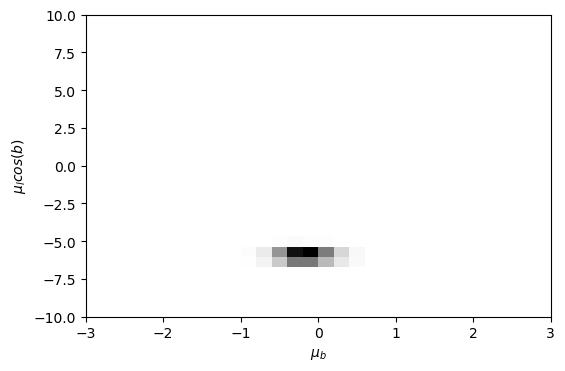

In [109]:

plt.figure(dpi=100)

ranges = ((-3, 3), (-10, 10))
extent = sum(ranges, ())
H, _, _ = np.histogram2d(galactic_coords_w_pm.pm_b.to_value(),
                         galactic_coords_w_pm.pm_l_cosb.to_value(),
                         bins=(30, 30),
                         range=ranges)

plt.imshow(H.T, cmap='gray_r', origin='lower', extent=extent, aspect='auto')
plt.xlabel(r"$\mu_b$")
plt.ylabel(r"$\mu_l cos(b)$")
